# **Name: ** Daniel Lenehan 
# **Student Number: ** 15499152

In [1]:
import os.path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline
import datetime
import matplotlib.ticker as ticker
import matplotlib.dates as mdates

# Data Collection and Parsing  

In [2]:
# pd.read_html returns a list of dataframes each table is put into a df in this list 
tableList = pd.read_html("http://mlg.ucd.ie/modules/COMP30760/stocks/amzn.html")

In [4]:
# pd.concat joins all the tables together and ignore index to ensure that there are no repeat indexes
df = pd.concat(tableList, ignore_index=True)

In [5]:
# printing out the first 3 rows of the new df made from all the joined table dfs
df.head(3)

,Day,Month,Year,Open,High,Low,Close
0,2,1,2013,256.079987,258.100006,253.259995,257.309998
1,3,1,2013,257.269989,260.880005,256.369995,258.480011
2,4,1,2013,257.579987,259.799988,256.649994,259.149994


# Creating the final Dataset
 - Adding and removing columns

In [11]:
# Creating a date field which is the combination of the first three fields 
df['Date'] = None

In [12]:
# changing the type of the day, month, year fields to string so they can be used to make the date field
df['Day']= df.Day.astype(str)
df['Month']= df.Month.astype(str)
df['Year']= df.Year.astype(str)

In [13]:
# adding the three string columns of every row to make the date field for every row 
df['Date'] = df['Year'] + '-' + df['Month'] + '-' + df['Day']

In [14]:
# Looking at the new df 
df.head(3)

,Day,Month,Year,Open,High,Low,Close,Date
0,2,1,2013,256.079987,258.100006,253.259995,257.309998,2013-1-2
1,3,1,2013,257.269989,260.880005,256.369995,258.480011,2013-1-3
2,4,1,2013,257.579987,259.799988,256.649994,259.149994,2013-1-4


In [15]:
# quick function to return the day of a given date, might come in handy 
def getDay(day, month, year):
    temp = datetime.date(year,month, day)
    return temp.strftime("%A")

In [17]:
# quick function to return the day as a number of a given date 
def getDayNum(day, month, year):
    temp = datetime.date(year,month, day)
    return temp.weekday()

In [18]:
# Creating the day of week name and  week number fields 
df['Day_Week']= None
df['Day_Week_Num']= None

In [19]:
# For loop just adds the day week names and numbers to the df for possible use later
for x, row in df.iterrows():
    index = df.iloc[x].name
    date = df['Date'].iloc[x]
    
    # each iteration spilts the date field and passes the day, month and year to the functions I made
    d = date.split('-')
    df.loc[x, 'Day_Week'] = getDay(int(d[2]), int(d[1]), int(d[0]))
    df.loc[x, 'Day_Week_Num'] = getDayNum(int(d[2]), int(d[1]), int(d[0]))
        

In [20]:
# here i'm making a boolean field called Close_Gr_Open which is true if the closing stock is greater than the opening stock
df['Close_Gr_Open']= None

In [21]:
# setting the values for the new field. If the opening is less than closing value is true otherwise false
df['Close_Gr_Open'] = np.where(df['Open'] < df['Close'], True, False)

# Growth percentage field
Below I create a field for the growth percentage of the daily stock. It takes the closing stock price from one day and compares it with the opening stock price of the next day. If the stock price had increased between close of one day and the opening stock price of the next day, then this value will be positive. 
I will use it to show spikes both positive and negative in the stock price of Amazon. These spikes represent developments or events in the business e.g record lows or highs in quarterly profits.
I decided this would be a good way to calculate the value for this field because the New York Stock Exchange closes at 4pm and opens again at 9:30am so alot can develop inbetween these times which could affect the stock price. 

In [22]:
# Creating the growth percentage field
df['Growth_%']= np.nan

In [23]:
# For loop used to create all the values for the Growth_% field
for x, row in df.iterrows():
    index = df.iloc[x].name 
    openP  = df['Open'].iloc[x]
    
    #the if is just for the first row in the DF
    if(x > 0):
        closeP = df['Close'].iloc[x - 1]
    else:
        closeP = df['Close'].iloc[0]
        
    df.loc[x, 'Growth_%'] = ((( openP - closeP)/ closeP)*100)

# Range Field 
An interesting column showcasing the difference between the high and low stock price of the day for Amazon. This value will always be positive however a more in depth analysis will be needed to say whether the range being high or lower is a good or bad thing. For example a high range could indicate that the stock dropped massivley throughout the day or increased massively. As the range is only the difference in the high and low daily stocks I'll use other fields to confirm whether the range is positive or negative.  

In [24]:
# Here I'll create a column called range it shows the difference between the high and low daily stock prices 
df['Range'] = df['High'] - df['Low'] 

In [25]:
# Getting rid of the redudant columns e.g the day, month and year and replacing it with the date field
df = df.drop(df.columns[[0, 1, 2]], axis=1)

# DateTime Field
I dropped all redundant cells and created the date feild now I'll set it to the dateTime field and set the data frames index to this new dateTime field. 

In [26]:
# Converting the date column to the datetime type
df['Date'] = pd.to_datetime(df['Date'])

In [27]:
# setting the index of the df to date 
df = df.set_index(['Date'])

In [28]:
# looking at the new df
df.head(3)

,Open,High,Low,Close,Day_Week,Day_Week_Num,Close_Gr_Open,Growth_%,Range
Date,,,,,,,,,
2013-01-02,256.079987,258.100006,253.259995,257.309998,Wednesday,2,True,-0.478027,4.840011
2013-01-03,257.269989,260.880005,256.369995,258.480011,Thursday,3,True,-0.015549,4.510010
2013-01-04,257.579987,259.799988,256.649994,259.149994,Friday,4,True,-0.348199,3.149994


# Analysis and interpretation
I will try to analyse and display the information and trends the data has through a multitude of graphs. I will show these trends through daily monthly and annual frequencies. Amazon is a very interesting company to study. As you will see from the graphs below there stock is on a huge rise from 2013 -> 2017 however the rise is not without falls. Amazon seems to concentrate more on the future of the comapny putting alot of investment into customer service and satisfaction as well as putting massive investment into improving their services, developing new products and services and investing in new projects rather than just focusing on having a surplus or large profit at the end of quarterly analysis. These stratgies result in investors getting impatient at times showing stock drops but in the long run the plan is clearly working as the following graphs will show. 

#  Daily Opening Stock Prices
* The graph below showcases the linear rise in amazons opening stock from 2013 -> 2017. 
From the graph below we can see the opening stock for Amazon is rising at a dramatic rate in general. In 2013 the stock rose fairly steadily however in 2014 the stock overall actually decreased in value. After the poor year that was 2014 the stock began to shoot up right through 2015 -> 2017 where it was leaving 2017. As we will see later on this poor 2014 year was due to alot of investment causing quarterly lose. However clearly it paid off in the long run.  

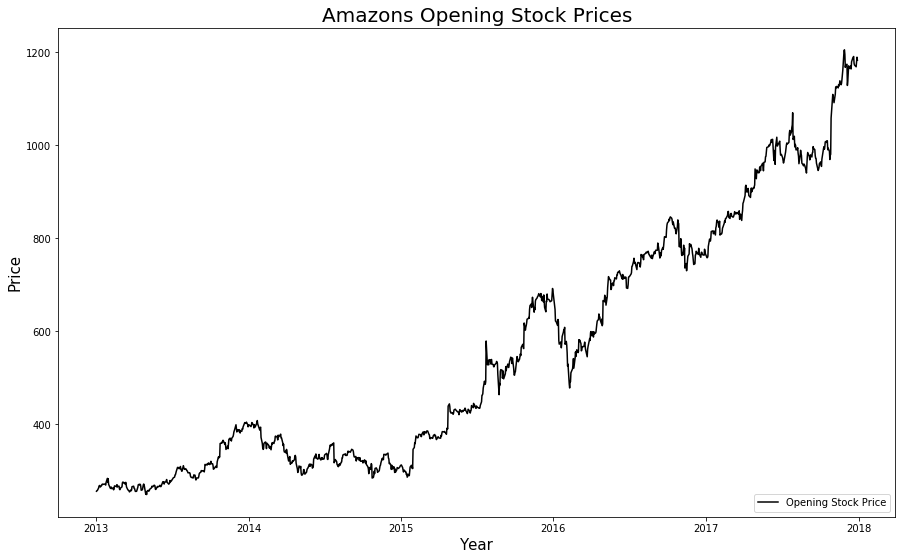

In [29]:
plt.figure(num=None, figsize=(15,9))

# Graph Data
# The x-axis is the years and the y-axis is the Prices the black line representing the Opening Stock Price for Amazon
plt.plot_date(x=df.index, y=df['Open'], fmt="k", label='Opening Stock Price')

# Graph desgin 
plt.legend(loc=4)
plt.xlabel('Year', fontsize='15')
plt.ylabel('Price', fontsize='15')
plt.title('Amazons Opening Stock Prices', fontsize='20')
plt.show()

# Comparision of Daily Opening and Closing Stock Prices
* This Graph is a good foreshadowing of what is to come as it shows some of the peaks where stock prices have risen or drop on a given day. Later graphs will go into more depth. 
* As expected the graph below shows that both opening and both opening and closing stock prices show a linear rise with some highs and lows over the years. 
* However interestingly we can see many instances of were the opening stock prices are higher than the closing stock prices. So this could indicate the stock price drops as the day goes on or some event occcured during these days related to Amazon that caused a drop in stock price

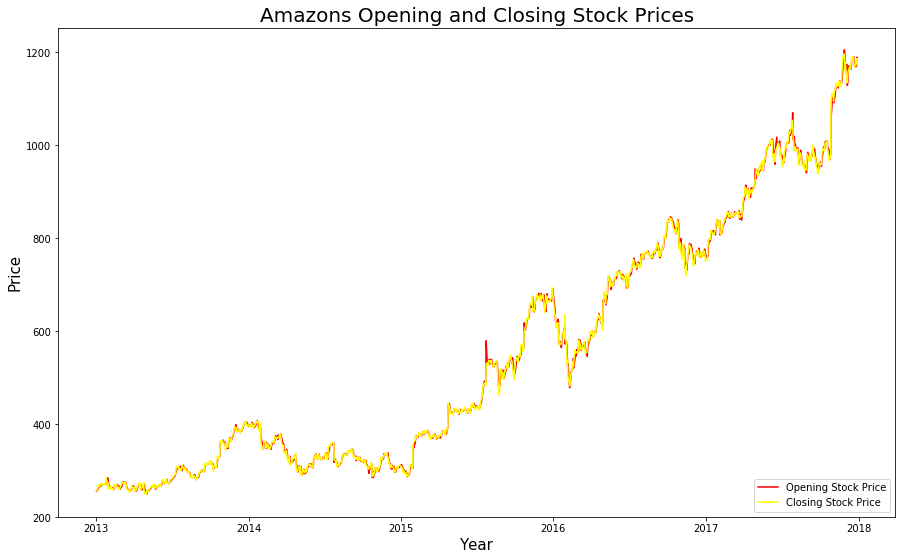

In [30]:
plt.figure(num=None, figsize=(15,9))

# Graph Data
# The x-axis is the years and the y-axis is Stock Prices with colored lines for the Opening and Closeing Stocks
plt.plot_date(x=df.index, y=df['Open'], fmt="k", label='Opening Stock Price', c='red')
plt.plot_date(x=df.index, y=df['Close'], fmt="k", label='Closing Stock Price', c='yellow')

# Graph desgin 
plt.legend(loc=4)
plt.xlabel('Year', fontsize='15')
plt.ylabel('Price', fontsize='15')
plt.title('Amazons Opening and Closing Stock Prices', fontsize='20')
plt.show()

# Precise comparision of the Daily Open and Close Stock Prices. 
* This graph uses the 'Close_Gr_Open' field I created above and shows that 50.5% of the days the opening price is greater than the closing price meaning a drop in the stock as the day goes on and 49.5% of the time the opening price is greater than the closing price meaning an increase in the stock from the start to the end of the market day overall.  
* The graph below show cases the exact percentages of whether the stock prices of a given day were higher opening or closing. As expected there are more days where the stock prices drop by the end of the day. However he difference is not as big as I thought at first showing only 1% more days where the stock price is less closing than it is opening. This covers everyday of all the years.  

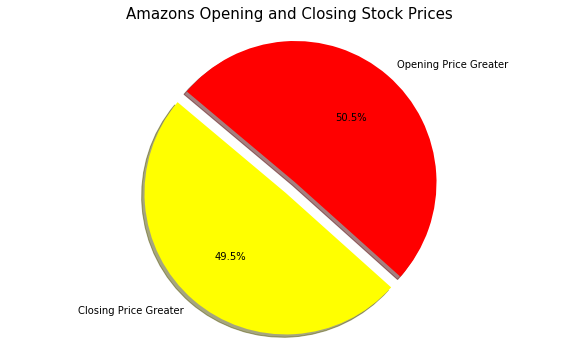

In [31]:
plt.figure(num=None, figsize=(10,6))

# Graph desgin 
plt.title('Amazons Opening and Closing Stock Prices', fontsize='15')
labels = 'Closing Price Greater', 'Opening Price Greater'
sizes = [len(df.loc[df['Close_Gr_Open'] == True]), len(df.loc[df['Close_Gr_Open'] == False])]
colors = ['yellow', 'red']
explode = (0.1, 0) 
 
# Plotting the data
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()

# Different Time Frequencies 
For the next couple of graphs I will use the resampling and rolling functions to showcase the opening stock data in different lights through these different time series. 

# Montly Opening Stock Prices
* The graph below shows the monthly opening stock prices taking the mean of each month for every year. 

In [25]:
# First I put the index and open values into a series
df1 = pd.Series(df['Open'])
# Then resampled the series by the mean of the months 
df1 = df1.resample('M').mean()

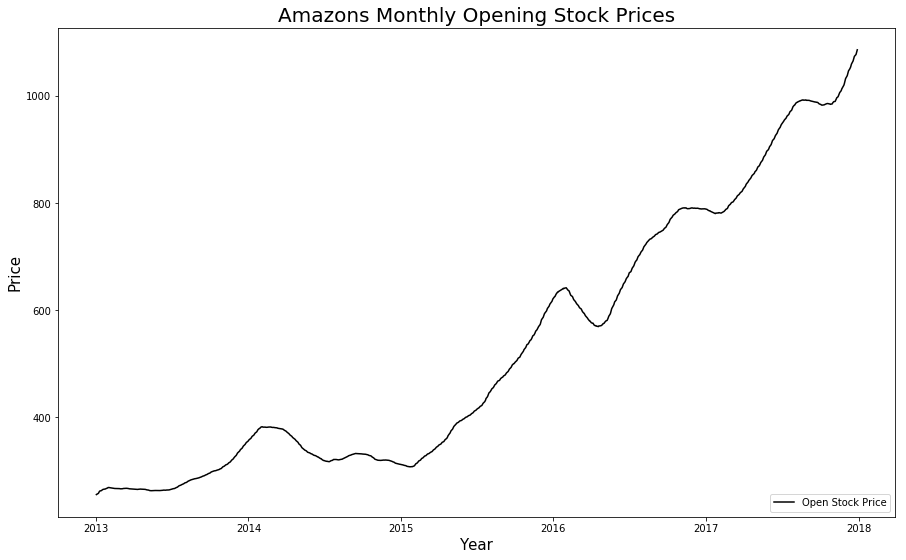

In [38]:
plt.figure(num=None,figsize=(15,9))

# Graph Data
# The x-axis is the year and the y-axis is the stock prices with the black line representing the monthly opening stock
plt.plot(df1,label='Open Stock Price', c='Black')

# Graph desgin 
plt.legend(loc=4)
plt.xlabel('Year', fontsize='15')
plt.ylabel('Price', fontsize='15')
plt.title('Amazons Monthly Opening Stock Prices', fontsize='20')
plt.show()

# Yearly Opening Stock Prices
* The graph below shows the yearly opening stock prices taking the mean of each year. Amazons yearly stock rise is amazing and is almost completely linear and is continuning to rise sharply right through 2017. 

In [217]:
# First I put the index and open values into a series
df1 = pd.Series(df['Open'])
# Then resampled the series into Yearly means. 
df1 = df1.resample('A').mean()

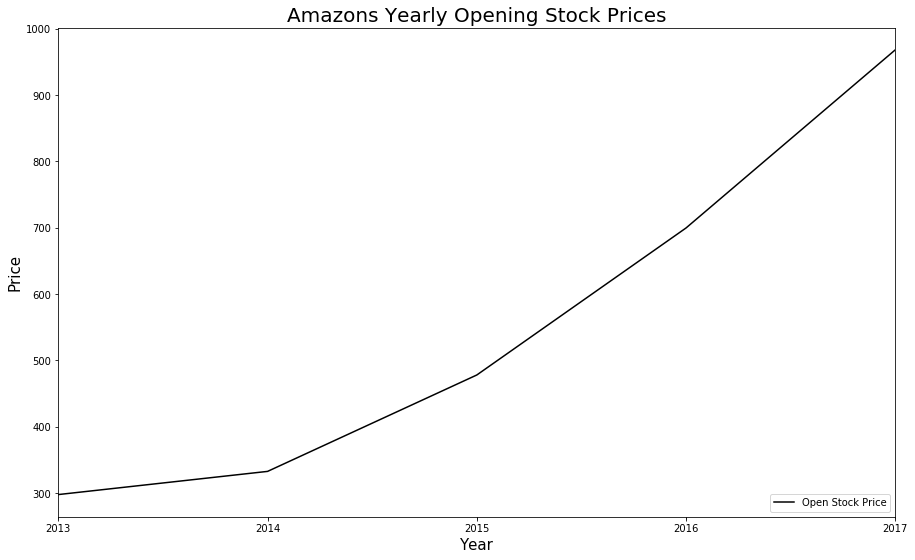

In [218]:
plt.figure(num=None,figsize=(15,9))

# Graph Data
# The x-axis is the year and the y-axis is the stock prices with the black line representing the Yearly Opening stock Price
df1.plot(label='Open Stock Price', c='Black')

# Graph desgin 
plt.legend(loc=4)
plt.xlabel('Year', fontsize='15')
plt.ylabel('Price', fontsize='15')
plt.title('Amazons Yearly Opening Stock Prices', fontsize='20')
plt.show()

# Daily Opening Stock Prices every 50 Days
* The graph below showcases stock prices of the amazon stock in peroids of 50 days. It shows the same linear rise as the first graph but gets the average of every 50 days as a single value and plots that data.

In [34]:
# First I put the index and open values into a series
df1 = pd.Series(df['Open'])
# I use rolling averages for every 50 days. The rolling function gets the average of every 50 days and counts it as one value
df1 = df['Open'].rolling(window='50D').mean()

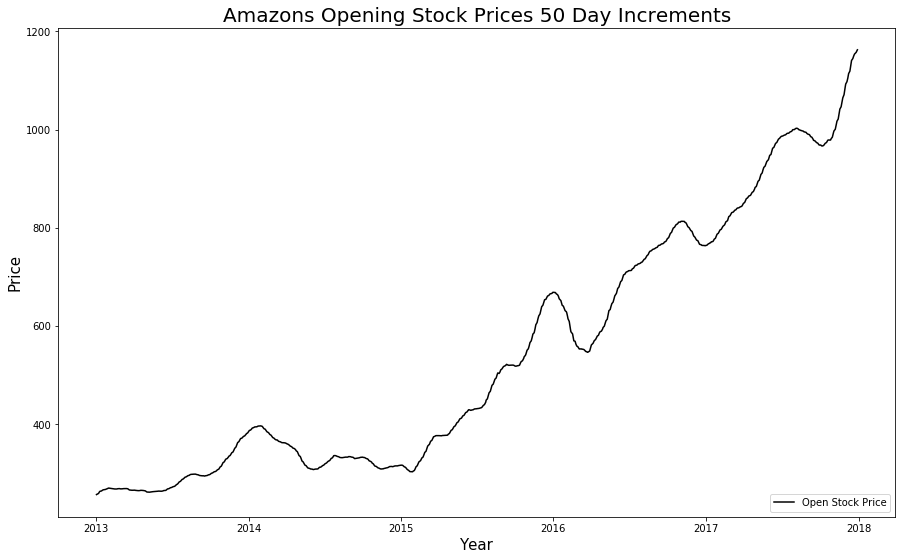

In [36]:
plt.figure(num=None,figsize=(15,9))

# Graph Data
# The x-axis is the year and the y-axis is Opening Stock Prices for every 50 days 
plt.plot(df1,label='Open Stock Price', c='Black')

# Graph desgin 
plt.legend(loc=4)
plt.xlabel('Year', fontsize='15')
plt.ylabel('Price', fontsize='15')
plt.title('Amazons Opening Stock Prices 50 Day Increments', fontsize='20')
plt.show()

# Daily Opening Stock Prices every 100 Days
* Here I use rolling avergaes for every 100 days, in the case of amazons stock the higher the rollling average we use the more straight the line becomes as expected from the yearly graph we had before. 

In [37]:
# First I put the index and open values into a series
df1 = pd.Series(df['Open'])
# I use rolling averages for every 100 days. The rolling function gets the average of every 100 days and counts it as one value
df1 = df['Open'].rolling(window='100D').mean()

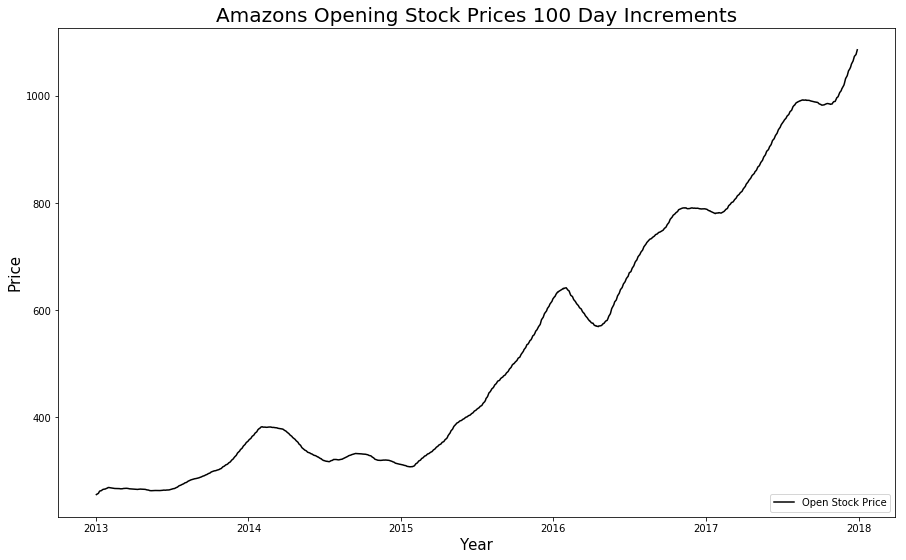

In [38]:
plt.figure(num=None,figsize=(15,9))

# Graph Data
# The x-axis is the year and the y-axis is Opening Stock Prices for every 100 days 
plt.plot(df1,label='Open Stock Price', c='Black')

# Graph desgin 
plt.legend(loc=4)
plt.xlabel('Year', fontsize='15')
plt.ylabel('Price', fontsize='15')
plt.title('Amazons Opening Stock Prices 100 Day Increments', fontsize='20')
plt.show()

# Daily Opening Stock Prices every 200 Days
* The graph data now rolled into averages of every 200 days is now almost the same as the yearly representation for the opening stock prices. Showing amazons huge stock rise with a dip in 2014 followed by a major rise from 2015 onwards. 

In [39]:
# First I put the index and open values into a series
df1 = pd.Series(df['Open'])
# I use rolling averages for every 200 days. The rolling function gets the average of every 200 days and counts it as one value
df1 = df['Open'].rolling(window='200D').mean()

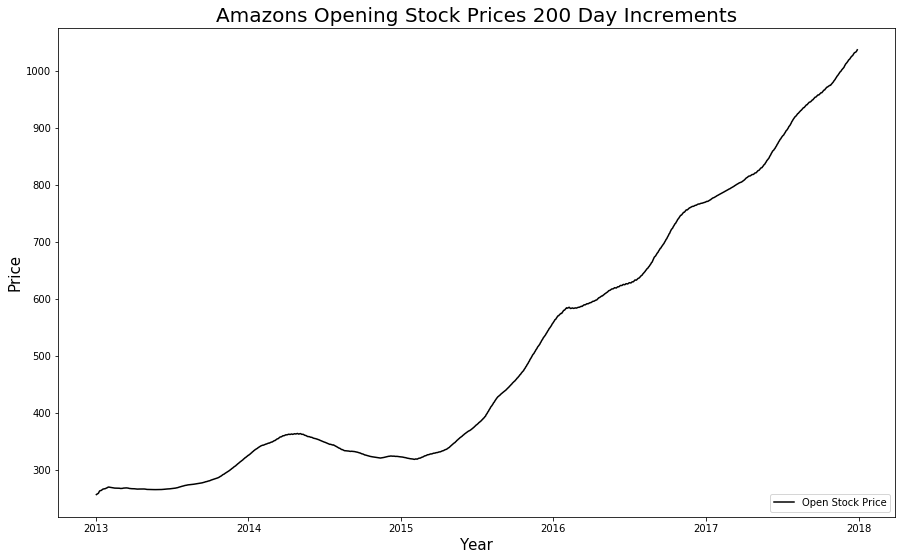

In [40]:
plt.figure(num=None,figsize=(15,9))

# Graph Data
# The x-axis is the years set and the y-axis is Opening Stock Prices for every 200 days 
plt.plot(df1,label='Open Stock Price', c='Black')

# Graph desgin 
plt.legend(loc=4)
plt.xlabel('Year', fontsize='15')
plt.ylabel('Price', fontsize='15')
plt.title('Amazons Opening Stock Prices 200 Day Increments', fontsize='20')
plt.show()

# Growth Rates
The next few graphs show trends in the growth percentage which is the difference between the opening price of a given day and closing prices from the day before and the range which is the actual price difference between the high and low stock for each day. The range and the growth percentage fields are very useful for showing big developments/ events that cause the stock to drastically rise or fall. First I will create show graphs showcasing the range and growth percentage in a general manner then I will look deeper into why these spikes occured. 

# Daily Growth Percentages of Amazons Stock
* The growth percentage field is a very interesting and telling field. It shows drastic spikes in the amazon stock in both positive and negative ways. As you can see from the graph below there are both huge highs and lows for the growth percentage however more noticeably there are a couple of really high spikes that aren't mirrored to the same level in the lows. Also there seems to be more high spikes than low in general and most of the data is just above the positive growth percentage which confirms the rapid growth in Amazons stock over these years. 
* In 2014 the was alot more negative spikes than any year previous or after and no real high spikes in the stock during this year. 
* In contrast to 2014, 2015 had multiple positive spikes in the growth percentage showing 2015 to be a great year for amazons stock growth. 

In [224]:
# First I put the index and open values into a series
df1 = pd.Series(df['Growth_%'])

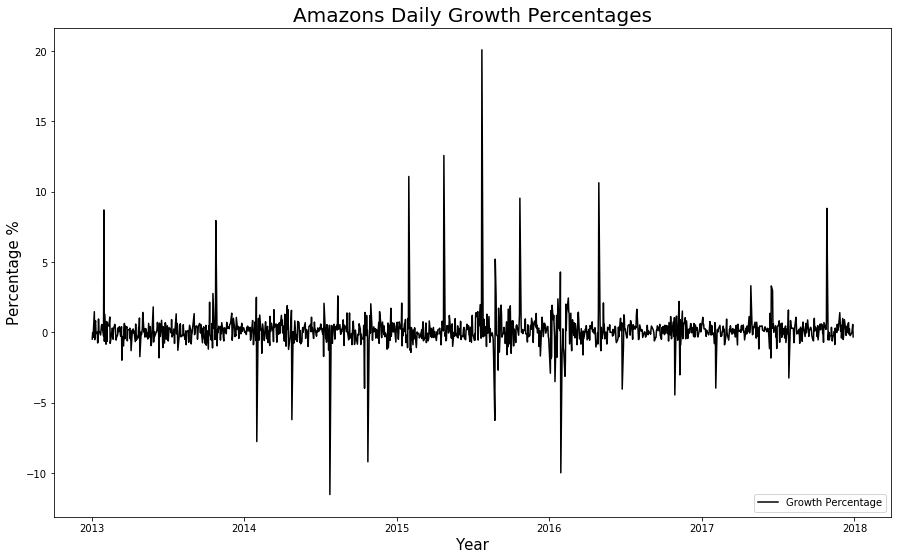

In [225]:
plt.figure(num=None, figsize=(15,9))

# Graph Data
plt.plot(df1, label='Growth Percentage', c='Black')

# Graph desgin 
plt.legend(loc=4)
plt.xlabel('Year', fontsize='15')
plt.ylabel('Percentage %', fontsize='15')
plt.title('Amazons Daily Growth Percentages', fontsize='20')
plt.show()

# Growth percentage table Yearly
* The table below shows the growth percentage average over each year. As we saw above 2014 was a bad year and 2015 was quite a
good one. The growth percentage is the growth from one day to the next. So for 2015 having an avergae daily growth of .3% is huge. 

In [221]:
# Groupby, grouping the growth percentage by the date index 'year' 
df.groupby(df.index.year)[["Growth_%"]].mean()

,Growth_%
Date,
2013,0.129472
2014,-0.025121
2015,0.306700
2016,0.076525
2017,0.184055


# Growth percentage by Monthly Means 
* The graph below shows the mean of each months growth percentage. The growth percentage mean per month never rises above 1.5%. It again showcases the success of growth in 2015 for Amazon and the lack in growth for 2014 for Amazon. 

In [41]:
# First I put the index and open values into a series
df1 = pd.Series(df['Growth_%'])
# Here I use the rolling function to get the avergae growth percentage of each month
df1 = df['Growth_%'].rolling(window='30D').mean()

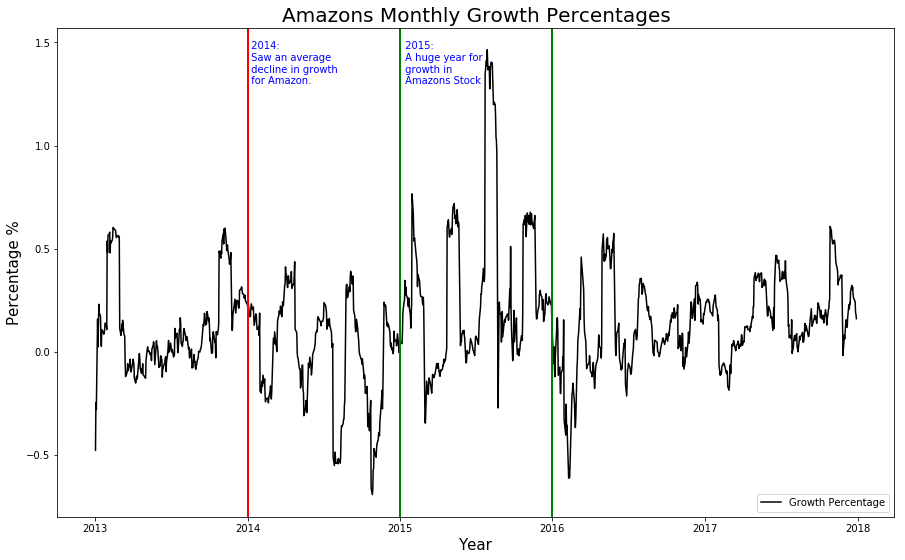

In [93]:
plt.figure(num=None, figsize=(15,9))

# Graph Data
plt.plot(df1, label='Growth Percentage', c='Black')

# Lines and text for 2015 the year of drastic growth and a projection for the grow in the years to come 
# Dates for text a lines not set to the first and last of the month because it wasn't as neat 
plt.axvline(pd.to_datetime('2015-01-01'),  color='g', lw=2)
plt.axvline(pd.to_datetime('2015-012-30'), color='g', lw=2)
plt.text(pd.to_datetime('2015-01-05'), 1.3,' 2015: \n A huge year for \n growth in \n Amazons Stock', color='blue')

# Lines and text for 2014 the year of no growth overall 
plt.axvline(pd.to_datetime('2014-01-01'), color='r', lw=2)
plt.text(pd.to_datetime('2014-01-01'), 1.3,' 2014: \n Saw an average \n decline in growth \n for Amazon.', color='blue')


# Graph desgin 
plt.legend(loc=4)
plt.xlabel('Year', fontsize='15')
plt.ylabel('Percentage %', fontsize='15')
plt.title('Amazons Monthly Growth Percentages', fontsize='20')


plt.show()

# In depth look at Amazons unsuccessful 2014
**Big Investments result in quarterly loss meaning drops in the stock price**
* As we saw from the previous growth percentage graphs Amazons 2014 was a very bad year. The average daily growth for 2014 was a minus value of -0.02. In the graph below I'll look at some of the decline spikes in the growth percentage that led to such a poor year. Amazon makes alot of investments in 2014 resulting in overall loses for quarters so investors get tired and begin to opt out causing stock price to drop. 
<br></br>
<br></br>
* 2014-01-31: Amazon suffers its biggest ever one-day price drop since going public in May 1997. Amazon had a very dissapointing fourth quarter with its 20% expected revenue rise falling short 470 million dollars causing a huge drop in the stock price. This record breaking low for Amazon really set the trend for a poor year.
<br></br>
<br></br>
* 2014-04-25: Amazon reports that its operating income fell 19 percent. They also forecasted that the next quarter would show flat revenue and a loss that might be as big as 455 million. Which struck fear into investors casuing a stock price drop.  
<br></br>
<br></br>
* 2014-07-25: Although Amazons sales increased by 20% they reported a loss of 126 million which caused their stock to drop once again by a further 11% ovenight in this case. Amazons loss is a result of huge investments in services like Fire Tv, Fire phone and Sunday deliverly around this time.
<br></br>
<br></br>
* 2014-10-24: Amazon reports 260 million less revenue than expected aswell as a possible loss in the fourth quarter of up to 570 million. The fourth quarter usally being the most successful quarter for business resulting in another huge drop in Amazons stock price to end the year. 
<br></br>
<br></br>
* From the analysis above it is clear amazon ranks investment over quarterly profit which might boad well in the future of the comapny but obviously in 2014 did not transfer to the stock price due to many quarterly loses.  

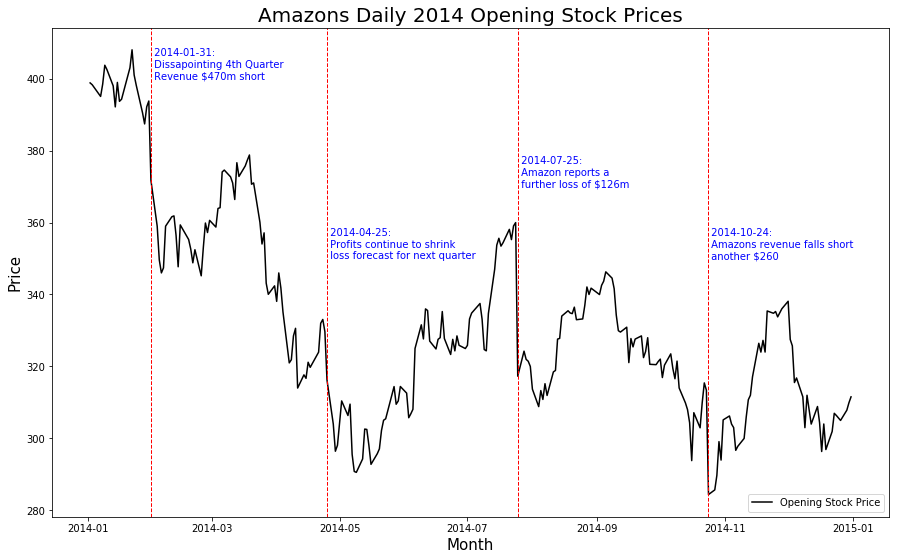

In [94]:
# An In depth look at 2015 a very successful year for amazon opening stock prices 
plt.figure(num=None, figsize=(15,9))

# Graph Data
# The x-axis 
plt.plot(df[df.index.year == 2014]['Open'], label='Opening Stock Price', color='black')

# Graph desgin 
plt.legend(loc=4)

# Line and text for stock price low spikes
plt.axvline(pd.to_datetime('2014-01-31'), color='r', linestyle='--', lw=1)
plt.text(pd.to_datetime('2014-01-31'), 400,' 2014-01-31: \n Dissapointing 4th Quarter \n Revenue $470m short', color='blue')
plt.axvline(pd.to_datetime('2014-04-25'), color='r', linestyle='--', lw=1)
plt.text(pd.to_datetime('2014-04-25'), 350,' 2014-04-25: \n Profits continue to shrink \n loss forecast for next quarter', color='blue')
plt.axvline(pd.to_datetime('2014-07-25'), color='r', linestyle='--', lw=1)
plt.text(pd.to_datetime('2014-07-25'), 370,' 2014-07-25: \n Amazon reports a \n further loss of $126m ', color='blue')
plt.axvline(pd.to_datetime('2014-10-24'), color='r', linestyle='--', lw=1)
plt.text(pd.to_datetime('2014-10-24'), 350,' 2014-10-24: \n Amazons revenue falls short \n another $260', color='blue')

plt.xlabel('Month', fontsize='15')
plt.ylabel('Price', fontsize='15')
plt.title('Amazons Daily 2014 Opening Stock Prices', fontsize='20')
plt.show()

# In depth look at Amazons successful 2015
* In contrast to 2014, Amazons 2015 was a year of high growth averaging .30% growth daily. In the following graph I'll showcase some of the events that caused 2015 to be such a successful year of growth for the company. 
<br></br>
* 2015-01-30: After a very strong holiday and sale season Amazons stock rose massively increasing 11% from the close of the 29th to opening on the 30th. This rise never drops and continues up through Febuary.
<br></br>
* 2015-04-24: Amazon provides finanical information for the first time on its Web services boasting a revenue of 1.6bn and a rise of 49 percent since last year. Amazon has recently put loads of investment into improving its delivery times and prices from its one-hour delviery service Prime Now to Amazon Fresh testing drones. This price increase decreases a little then levels off for the rest of May and June.
<br></br>
* 2015-07-24: Amazons stock rise again as it blows past quartely earnings and revenue estimates and the market cap surpasses big  compeditor Wal-Mart.
<br></br>
* 2015-08-24: The stock market open at an incredible low seeing the Dow Jones Industrial Average down by 1000 points. Not specifically related to Amazon however caused drop in the stock for a while. 
<br></br>
* 2015-10-23: Amazon posts an unexpected profit and its shares soar. Amazon made 500m more revenue than investors had anticapted causing a 10% increase in stock price over night. This increase dips slightly before continuing to rise into 2016 overcasting a bright and linear rise to Amazons stock in the comning years. 

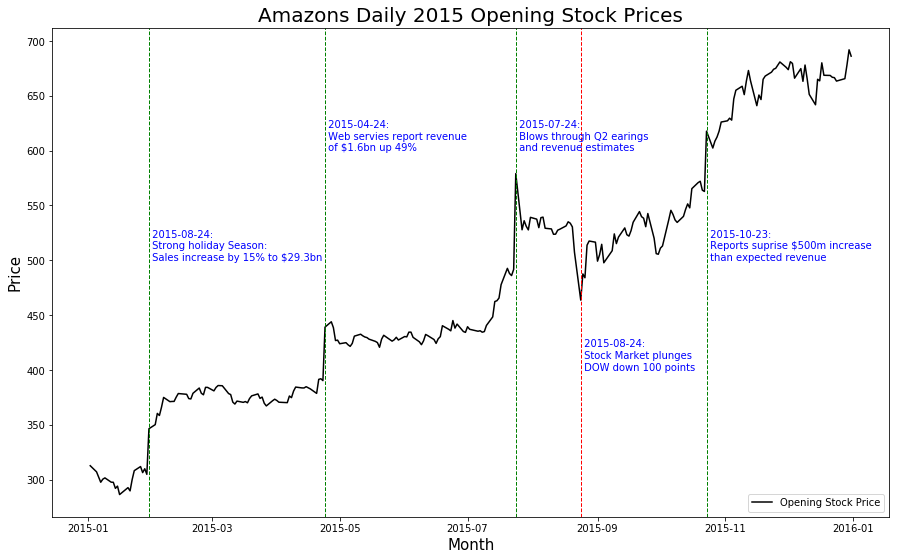

In [95]:
# An In depth look at 2015 a very successful year for amazon opening stock prices 
plt.figure(num=None, figsize=(15,9))

# Graph Data
# The x-axis 
plt.plot(df[df.index.year == 2015]['Open'], label='Opening Stock Price', color='black')

# Graph desgin 
plt.legend(loc=4)

# Line and text for stock price high spikes
plt.axvline(pd.to_datetime('2015-07-24'), color='g', linestyle='--', lw=1)
plt.text(pd.to_datetime('2015-07-24'), 600,' 2015-07-24: \n Blows through Q2 earings \n and revenue estimates', color='blue')
plt.axvline(pd.to_datetime('2015-04-24'), color='g', linestyle='--', lw=1)
plt.text(pd.to_datetime('2015-04-24'), 600,' 2015-04-24: \n Web servies report revenue \n of $1.6bn up 49%', color='blue')
plt.axvline(pd.to_datetime('2015-10-23'), color='g', linestyle='--', lw=1)
plt.text(pd.to_datetime('2015-10-23'), 500,' 2015-10-23: \n Reports suprise $500m increase \n than expected revenue', color='blue')
plt.axvline(pd.to_datetime('2015-01-30'), color='g', linestyle='--', lw=1)
plt.text(pd.to_datetime('2015-01-30'), 500,' 2015-08-24: \n Strong holiday Season: \n Sales increase by 15% to $29.3bn', color='blue')

# Line and text for stock price low spikes
plt.axvline(pd.to_datetime('2015-08-24'), color='r', linestyle='--', lw=1)
plt.text(pd.to_datetime('2015-08-24'), 400,' 2015-08-24: \n Stock Market plunges \n DOW down 100 points', color='blue')

plt.xlabel('Month', fontsize='15')
plt.ylabel('Price', fontsize='15')
plt.title('Amazons Daily 2015 Opening Stock Prices', fontsize='20')
plt.show()

# Daily Range Difference of Amazons Stock
The graph below shows some very interesting information as it shows huge spikes in the difference between the high and low stock 
for each day. However these difference are not always a positive as a big range number can indicate both the stock falling and rising on a given day. As it is just the difference between the low and high stock value of the day. I'll showcase to opposite sides of the range below. 
* 2017-06-09: In 2017 we see the biggest range of all the given stock data for amazon however the range represents a negative event in this case. The U.S. stock markets punish tech companies on this day resulting in the big five losing more than 97.5m in market value. Amazon suffering a 5% drop in its stock price. 
<br></br>
<br></br>
* 2015-07-24: As reported in the 2015 in depth review Amazons stock rises as it blows past quartely earnings and revenue estimates and the market cap surpasses big compeditor Wal-Mart. So in this case the range represents a positive event occuring on this day. 

In [96]:
# First I put the index and open values into a series
df1 = pd.Series(df['Range'])

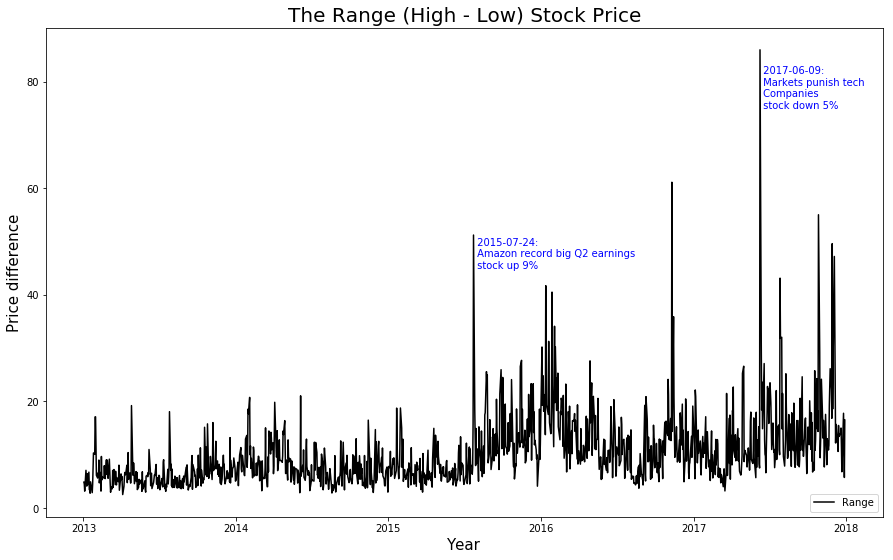

In [97]:
plt.figure(num=None, figsize=(15,9))

# Graph Data
plt.plot(df1, label='Range', c='Black')

# High range but stock price down example 
plt.text(pd.to_datetime('2017-06-09'), 75,' 2017-06-09: \n Markets punish tech \n Companies \n stock down 5%', color='blue')

# High range with high stock price example 
plt.text(pd.to_datetime('2015-07-24'), 45,' 2015-07-24: \n Amazon record big Q2 earnings \n stock up 9%', color='blue')

# Graph desgin 
plt.legend(loc=4)
plt.xlabel('Year', fontsize='15')
plt.ylabel('Price difference', fontsize='15')
plt.title('The Range (High - Low) Stock Price', fontsize='20')
plt.show()

# Some Graphs I was interested in.
The following graphs do not necessarily apply to Amazon only to broader trends in the US stock market as a whole. Out of interest I breifly looked at trends in the stock markets across the specific days of the week and the months of the year. They are known as the Weekend and January Effect. 

# Mean of Stock Prices for each day of the Week
Here I briefly examine the weekend effect. Under this effect the average stock prices on a friday fall on the following stock day, Monday. In the graph below we can clearly see this effect at least in Amazons case. The start of the week on average has a low stock price which begins to increase linearly before it tops out on the friday then the cycle begins again the next stock day on Monday. 

In [192]:
# This groupby gets the avergae stock price for every day of the stock week 
dayMeans =  df.groupby(['Day_Week_Num'])[["Open"]].mean().values

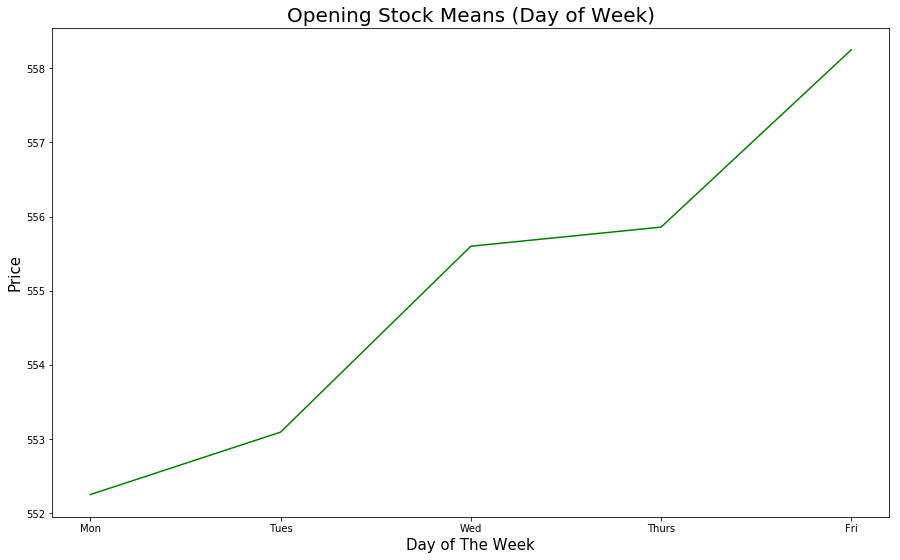

In [202]:
# This x variable is the number of unique values one for everyday of the week
x = np.arange(5)
fig, ax = plt.subplots()
fig.set_size_inches(15, 9)

#Graph design 
ax.set_title('Opening Stock Means (Day of Week)', fontsize=20)
ax.set_xlabel('Day of The Week', fontsize=15)
ax.set_ylabel('Price', fontsize=15)

#Graph data
#Plots the day of the week sorted by day number values 
ax.plot(dayMeans, color='g')
# Ticks entered manually as the values are sorted by the day of the week number e.g. (0 = Monday)
plt.xticks(x, ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri'])
plt.show()

# Mean of Stock Prices for each Month of the Year
Here I briefly examine the January effect. The January effect is a seasonal increase in stock prices during the month of January. Analysts generally attribute this rally to an increase in buying, which follows the drop in price that typically happens in December when investors, engaging in tax-loss harvesting to offset realized capital gains, prompt a sell-off. Another possible explanation is that investors use year-end cash bonuses to purchase investments the following month. In the Graph below showing Amazons monthly averages this effect is mirrored. January has the lowest average stock price which begins to rise again drastically with slight drops in March, August and December. 


In [200]:
# This groupby gets the avergae stock price for every month of the stock week 
monthMeans = df.groupby(df.index.month)[["Open"]].mean().values

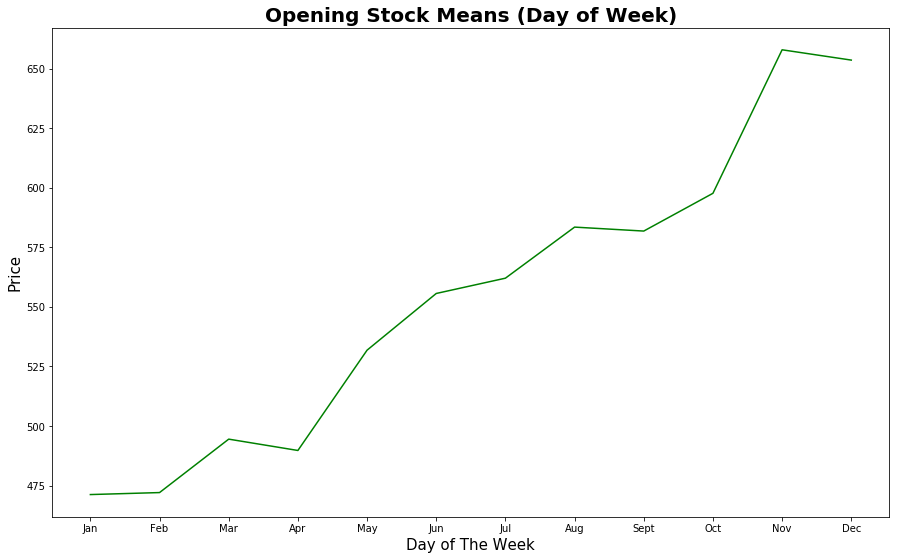

In [201]:
# This x variable is the number of unique value one for everyday of the week
x = np.arange(12)
fig, ax = plt.subplots()
fig.set_size_inches(15, 9)

#Graph design 
ax.set_title('Opening Stock Means (Day of Week)', fontsize=20, fontweight='bold')
ax.set_xlabel('Day of The Week', fontsize=15)
ax.set_ylabel('Price', fontsize=15)

#Graph data
#Plots the months of the year sorted by month number values 
ax.plot(monthMeans, color='g')
# Ticks entered manually as the values as they are sorted by the month number e.g. (1  = Jan)
plt.xticks(x, ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec'])
plt.show()